<a href="https://colab.research.google.com/github/Rubiel1/Convolutional-Neural-Networks-Applied-to-Modification-of-Images/blob/main/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying digits.
The following algorithm focus on images of digits.





In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

pretrained_model = "lenet_mnist_model.pth"
!wget https://drive.google.com/drive/folders/1fn83DF14tWmit0RTKWRhPq5uVXt73e0h?usp=sharing
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the network
model = Net().to(device)

## Load the pretrained model
#model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

--2022-08-08 00:59:58--  https://drive.google.com/drive/folders/1fn83DF14tWmit0RTKWRhPq5uVXt73e0h?usp=sharing
Resolving drive.google.com (drive.google.com)... 108.177.119.113, 108.177.119.138, 108.177.119.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1fn83DF14tWmit0RTKWRhPq5uVXt73e0h?usp=sharing.1’

1fn83DF14tWmit0RTKW     [  <=>               ] 207.95K   853KB/s    in 0.2s    

2022-08-08 00:59:59 (853 KB/s) - ‘1fn83DF14tWmit0RTKWRhPq5uVXt73e0h?usp=sharing.1’ saved [212940]

CUDA Available:  False


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

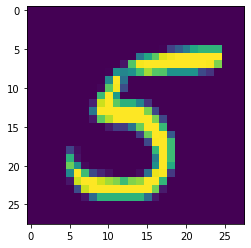

predicted class: 9 
 real class: 5


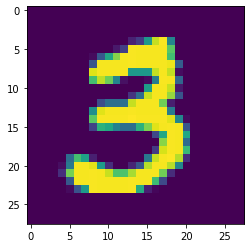

predicted class: 9 
 real class: 3


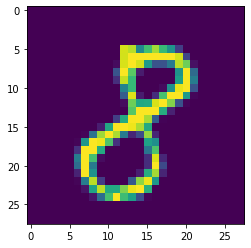

predicted class: 9 
 real class: 8


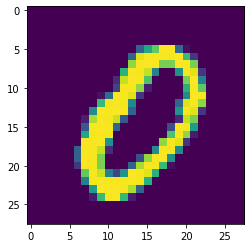

predicted class: 9 
 real class: 0


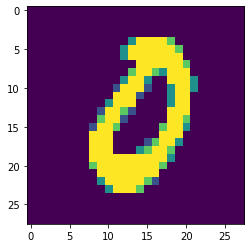

predicted class: 9 
 real class: 0


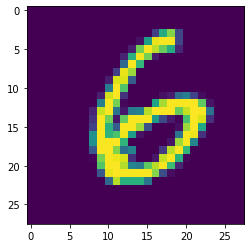

predicted class: 1 
 real class: 6


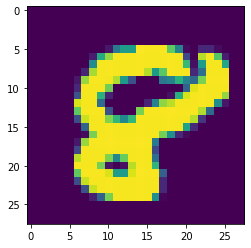

predicted class: 9 
 real class: 8


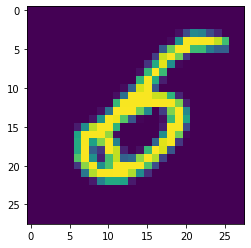

predicted class: 1 
 real class: 5


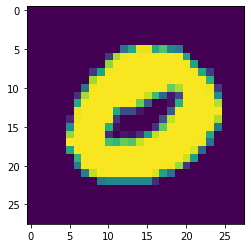

predicted class: 9 
 real class: 0


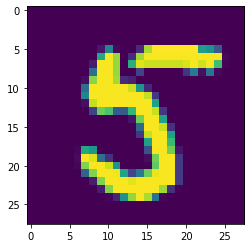

predicted class: 9 
 real class: 5


In [ ]:
plt.ion()

unloader = transforms.ToPILImage()  # reconvert into PIL image

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

index = 0
for data, target in test_loader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = False

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        image = data# plot the sample
        imshow(image)

        print(f"predicted class: {init_pred.item()} \n real class: {target.item()}")
        index = index+1
        if index ==10:
          break


Note that MNIST expects data of 32 by 32 pixels

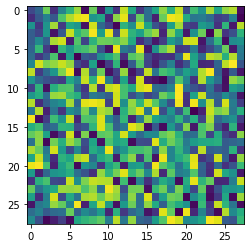

The value predicted is 9


In [ ]:
input = torch.randn(1, 1, 28, 28)
out = model(input)
init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
image = input# plot the sample
imshow(image)

print(f"The value predicted is {init_pred.item()}")

This notebook was written by Eric Dolores <http://rubiel1.github.io/>_.

This notebook is based on a notebook created by Nathan Inkawhich <https://github.com/inkawhich>_.
